# Maths Lab - 2

## Teammates:
#### Akshita Potdar - 702768460
#### Kalyani Khandait - 702768391
#### Logesh Gangadharan - 702723890





*   Learn how to standardize data.
*   Implement a gradient descent algorithm from scratch.
*   Implement an algorithm as a Python class.
*   Visualize the Hoeffding bound on a simple problem


## 1. Loading and Getting to know the dataset

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

In [ ]:

diabetes.target[:3]
diabetes.data.shape

(442, 10)

## Adding more features using polymial transformation

In [ ]:
poly = PolynomialFeatures(3,include_bias = False)
pdata = poly.fit_transform(x)

## splitting the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pdata, y, test_size=0.25,random_state=42)

## Scale X_train, y_train, X_test, y_test

In [ ]:

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(331, 285) (111, 285)


## fit a linear regression model

In [ ]:
train_scores = []
test_scores = []


In [ ]:
# fitting the linear regression model containing the first i variables
for i in range(1, X_train_scaled.shape[1] + 1):

    X_train_subset = X_train_scaled[:, :i]
    X_test_subset = X_test_scaled[:, :i]

    model = LinearRegression()
    model.fit(X_train_subset, y_train)

   # Predict
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    train_score = mean_squared_error(y_train, y_train_pred)
    test_score = mean_squared_error(y_test, y_test_pred)


    # Root Mean Square Error
    train_scores.append(train_score)
    test_scores.append(test_score)


## Plot the training score and the test score

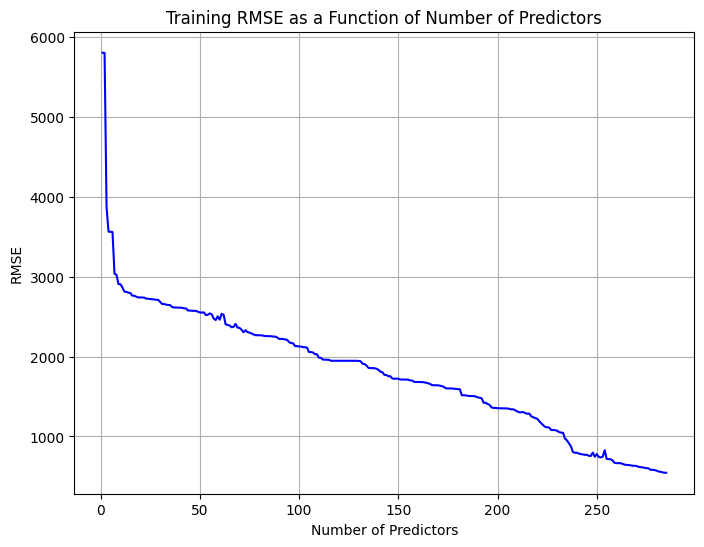

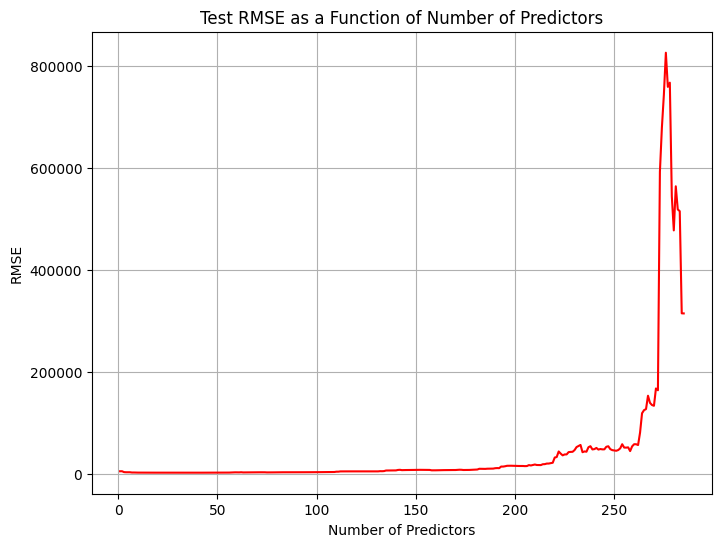

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, X_train_scaled.shape[1] + 1), train_scores, label='Training RMSE', color='blue')
plt.xlabel('Number of Predictors')
plt.ylabel('RMSE')
plt.title('Training RMSE as a Function of Number of Predictors')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, X_train_scaled.shape[1] + 1), test_scores, label='Test RMSE', color='red')
plt.xlabel('Number of Predictors')
plt.ylabel('RMSE')
plt.title('Test RMSE as a Function of Number of Predictors')
plt.grid(True)
plt.show()


#plotted seperately as the range of two graphs are differnt and this way its easier to compare

## Problem -2
##Gradient Descent Algorithm

Gradient Descent Results:
Estimated coefficients (theta_0, theta_1): [4.21509177 2.77011726]
Number of iterations: 752
Cost function value at convergence: 0.4032922819864349
Mean Squared Error (Gradient Descent): 0.8065845639728698

Sklearn LinearRegression Results:
Estimated coefficients (theta_0, theta_1): [4.21509616 2.77011339]
Mean Squared Error (Sklearn Linear Regression): 0.8065845639670531

Difference between Gradient Descent and Sklearn coefficients: [4.38849750e-06 3.87480476e-06]
Difference in MSE: 5.81668047061612e-12


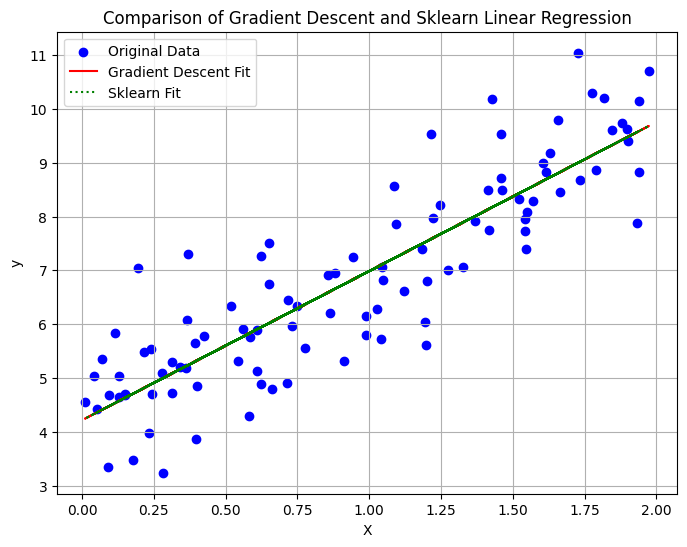

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating random data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Adding an intercept term to X
X_b = np.c_[np.ones((100, 1)), X]

#the cost function
def cost_function(theta, X, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)

def gradient(theta, X, y):
    m = len(y)
    return (1 / m) * X.T.dot(X.dot(theta) - y)

# Gradient Descent Algorithm
def gradient_descent(X, y, theta0, learning_rate, epsilon, maxit):
    theta = theta0
    i = 0

    while np.linalg.norm(gradient(theta, X, y)) > epsilon and i < maxit:
        theta = theta - learning_rate * gradient(theta, X, y)
        i += 1

    return theta, i
theta0 = np.random.randn(2, 1)

#  parameters
learning_rate = 0.1
epsilon = 1e-6
maxit = 1000


theta_gd, iterations = gradient_descent(X_b, y, theta0, learning_rate, epsilon, maxit)


# sklearn's LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
theta_sklearn = np.array([lin_reg.intercept_, lin_reg.coef_[0]]).reshape(-1, 1)

# Comparing -- Expected to have simillar results
print("Gradient Descent Results:")
print(f"Estimated coefficients: {theta_gd.ravel()}")
print(f"Number of iterations: {iterations}")
print(f"Cost function value at convergence: {cost_function(theta_gd, X_b, y)}")

#Mean Squared Error - Gradient Descent
y_pred_gd = X_b.dot(theta_gd)
mse_gd = mean_squared_error(y, y_pred_gd)
print(f"MSE- Gradient Descent: {mse_gd}")

print("\n Sklearn:")
print(f"Estimated coefficients: {theta_sklearn.ravel()}")

#Mean Squared Error - Sklearn Linear Regression
y_pred_sklearn = lin_reg.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f" MSE-Sklearn : {mse_sklearn}")

# Comparing
diff_coeffs = np.abs(theta_gd.ravel() - theta_sklearn.ravel())
print("\nDifference in coefficients:", diff_coeffs)
print(f"Difference in MSE: {abs(mse_gd - mse_sklearn)}")


plt.figure(figsize=(8, 6))
#original data
plt.scatter(X, y, color='blue', label='Original Data')
#gradient descent- predictions
plt.plot(X, X_b.dot(theta_gd), color='red', label='Gradient Descent')
# sklearn Linear Regression- predictions
plt.plot(X, X_b.dot(theta_sklearn), color='green', linestyle='dotted', label='Sklearn Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent vs Sklearn Linear Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Problem - 3
## Gradient descent algorithm inside a Python class

In [ ]:
import numpy as np

class LinReg:
    def __init__(self, epsilon=5e-3, maxit=10000, h=0.01, fit_intercept=True):
        self.epsilon = epsilon
        self.maxit = maxit
        self.h = h
        self.fit_intercept = fit_intercept
        self.beta = None

    def fit(self, X, y):

        if self.fit_intercept:
            X = np.c_[np.ones((X.shape[0], 1)), X]


        self.beta = np.random.randn(X.shape[1], 1)


        for i in range(self.maxit):
            gradient = (1 / len(y)) * X.T.dot(X.dot(self.beta) - y)
            if np.linalg.norm(gradient) < self.epsilon:
                break
            self.beta -= self.h * gradient

    def predict(self, X):

        if self.fit_intercept:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        return X.dot(self.beta)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

#gradient descent model
lin_reg_gd = LinReg(epsilon=1e-6, maxit=1000, h=0.1)
lin_reg_gd.fit(X, y)
y_pred_gd = lin_reg_gd.predict(X)

# Sklearn LinearRegression model
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(X, y)
y_pred_sklearn = lin_reg_sklearn.predict(X)
print("Gradient Descent Coefficients:", lin_reg_gd.beta.ravel())
print("Sklearn Coefficients:", np.r_[lin_reg_sklearn.intercept_, lin_reg_sklearn.coef_[0]])

# Comparing Mean Squared Error - expecting to be similar
mse_gd = mean_squared_error(y, y_pred_gd)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print("\nMSE Gradient Descent:", mse_gd)
print("MSE Sklearn:", mse_sklearn)


Gradient Descent Coefficients: [4.21509177 2.77011726]
Sklearn Coefficients: [4.21509616 2.77011339]

MSE Gradient Descent: 0.8065845639728698
MSE Sklearn: 0.8065845639670531


## Problem 4 - Hoeffding bound

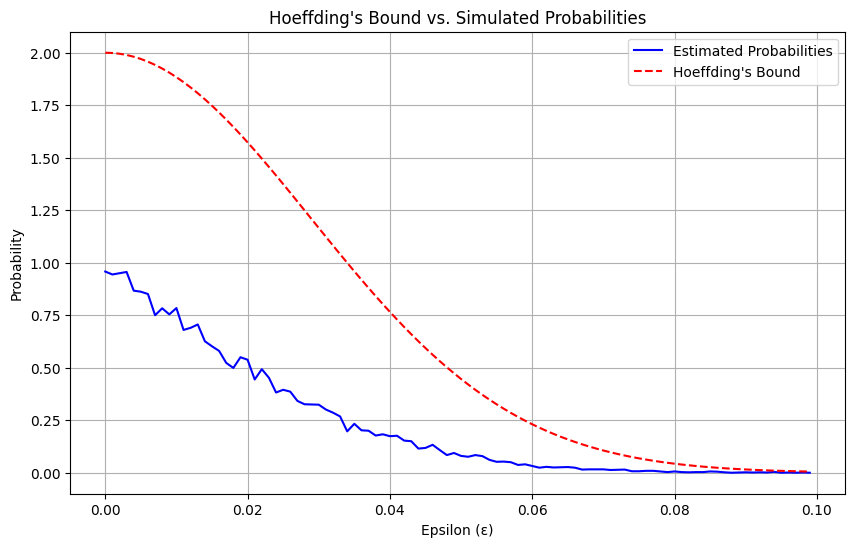

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


mu = 0.5
N = 300

# small values for epsilons
epsilons = np.arange(0.00, 0.1, 0.001)
num_simulations = 1000

# Initialize arrays to store results
estimated_probabilities = np.zeros(len(epsilons))
hoeffding_bounds = np.zeros(len(epsilons))



for idx, epsilon in enumerate(epsilons):
    count_exceeds_epsilon = 0  #using the formulas here

    for _ in range(num_simulations):
        sample = np.random.binomial(1, mu, N)
        nu = np.mean(sample)
        if abs(nu - mu) > epsilon:
            count_exceeds_epsilon += 1


    estimated_probabilities[idx] = count_exceeds_epsilon / num_simulations

    hoeffding_bounds[idx] = 2 * np.exp(-2 * epsilon**2 * N)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epsilons, estimated_probabilities, label='Estimated Probabilities', color='blue')
plt.plot(epsilons, hoeffding_bounds, label="Hoeffding's Bound", linestyle='--', color='red')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Probability')
plt.title("Hoeffding's Bound vs. Simulated Probabilities")
plt.legend()
plt.grid(True)
plt.show()



# basic code of Hoeffding is taken from chat.gpt changes made in the iteration